# Ejercicio 1

Se ha jugado al juego varias veces exportando diferentes .csv los cuales se encuentran en ML/Kart_X.csv con X [1,6]. Luego, se ha creado un .csv [KartData](data/KartData.csv) que contiene la suma de todos esos datos.

,ray1,ray2,ray3,ray4,ray5,kartx,karty,kartz,time,action
18,-1.00000,6.520880,6.489885,4.611051,4.588951,15.98896,0.275744,3.10501,1.901252,ACCELERATE
19,-1.00000,6.520880,6.489885,4.611051,4.588951,15.98896,0.275745,3.10501,2.002407,ACCELERATE
20,-1.00000,6.520880,6.489885,4.611051,4.588951,15.98896,0.275745,3.10501,2.100557,ACCELERATE
21,-1.00000,6.520880,6.489885,4.611051,4.588951,15.98896,0.275745,3.10501,2.203473,ACCELERATE
22,-1.00000,6.520880,6.489885,4.611051,4.588951,15.98896,0.275745,3.10501,2.303166,ACCELERATE
...,...,...,...,...,...,...,...,...,...,...
1821,12.81551,6.454105,10.683140,5.797755,3.618026,-41.65083,0.279160,44.54146,30.101710,LEFT_ACCELERATE
1822,13.37768,6.209239,9.997694,5.524345,3.873820,-42.35545,0.279174,43.21133,30.202940,LEFT_ACCELERATE
1823,16.76473,6.253637,8.180334,5.308517,3.979966,-42.85721,0.279199,41.81615,30.302810,LEFT_ACCELERATE
1824,-1.00000,6.672732,6.537941,5.271104,3.931475,-43.09800,0.279213,40.37720,30.401190,LEFT_ACCELERATE


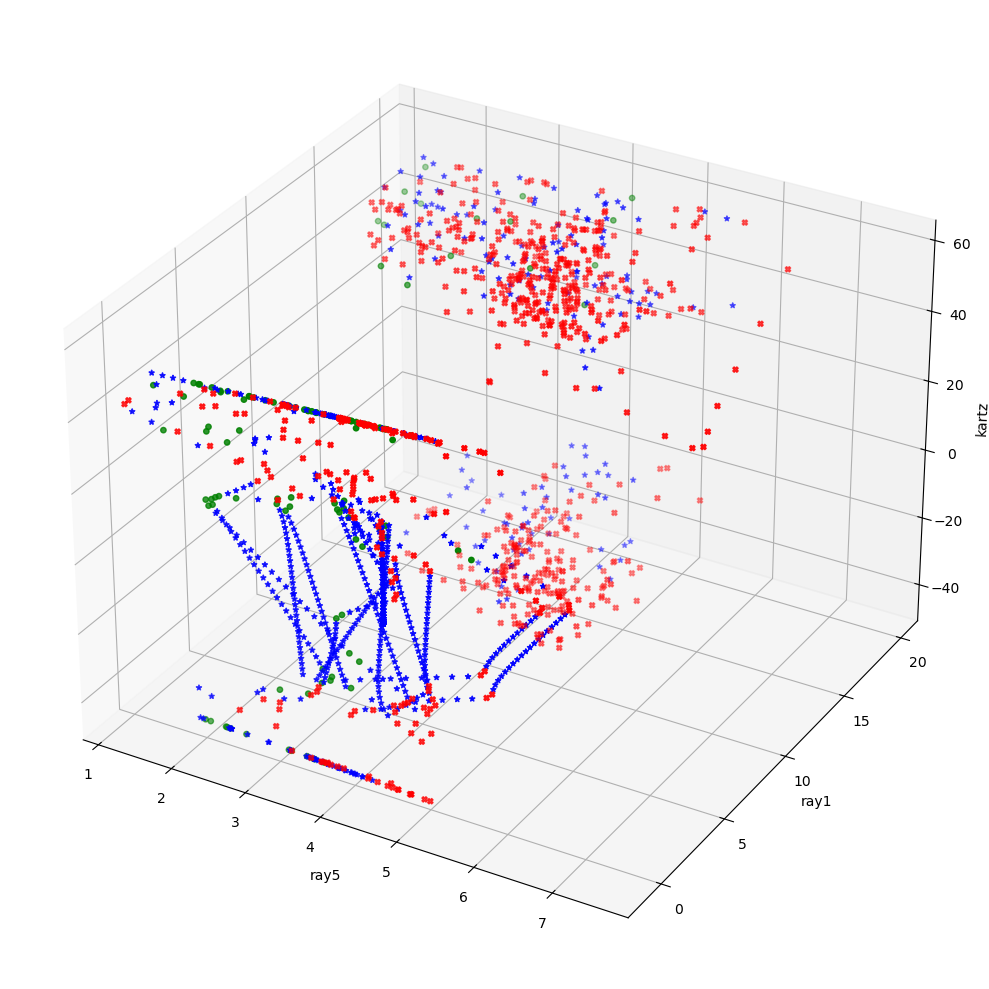

In [16]:
# Ejercicio 2 y 3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from Utils import load_data_csv

x_columns = ["ray1", "ray2", "ray3", "ray4", "ray5", "kartx", "kartz"]
gameData, X, y = load_data_csv("data/KartData.csv", x_columns, "action")
display(gameData)

df1 = pd.DataFrame(gameData, columns=x_columns)

scaling = StandardScaler()
scaling.fit(df1)
scaled_data = scaling.transform(df1)

principal = PCA(n_components=3)
principal.fit(scaled_data)
x = principal.transform(scaled_data)

feature_weights_mapping = {}
for i, component in enumerate(principal.components_):
    component_feature_weights = zip(x_columns, component)
    sorted_feature_weight = sorted(component_feature_weights, key=lambda x: abs(x[1]), reverse=True)
    feature_weights_mapping[i] = sorted_feature_weight

# En nuestro dataset, el número de clases es 3
# porque en ningún momento deceleramos (BRAKE)
label1 = feature_weights_mapping[0][0][0]
label2 = feature_weights_mapping[1][0][0]
label3 = feature_weights_mapping[2][0][0]

left_accelerate_pc1 = gameData[label1][y == "LEFT_ACCELERATE"]
right_accelerate_pc1 = gameData[label1][y == "RIGHT_ACCELERATE"]
accelerate_pc1 = gameData[label1][y == "ACCELERATE"]
left_accelerate_pc2 = gameData[label2][y == "LEFT_ACCELERATE"]
right_accelerate_pc2 = gameData[label2][y == "RIGHT_ACCELERATE"]
accelerate_pc2 = gameData[label2][y == "ACCELERATE"]
left_accelerate_pc3 = gameData[label3][y == "LEFT_ACCELERATE"]
right_accelerate_pc3 = gameData[label3][y == "RIGHT_ACCELERATE"]
accelerate_pc3 = gameData[label3][y == "ACCELERATE"]

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(left_accelerate_pc1, left_accelerate_pc2, left_accelerate_pc3, c='red', marker='X', s=15)
ax.scatter(right_accelerate_pc1, right_accelerate_pc2, right_accelerate_pc3, c='green', marker='o', s=15)
ax.scatter(accelerate_pc1, accelerate_pc2, accelerate_pc3, c='blue', marker='*', s=15)
ax.set_xlabel(label1)
ax.set_ylabel(label2)
ax.set_zlabel(label3)

plt.tight_layout()
plt.savefig("images/ejercicio2.png")
plt.show()

MLP 2 hidden layers accuracy: 0.7461669505962522
MLP accuracy: 0.7649063032367973
SKlearn accuracy: 0.747870528109029
SKlearn modified accuracy: 0.7512776831345827
KNN accuracy: 0.768313458262351
Decision Tree accuracy: 0.7666098807495741
Random Forest accuracy: 0.7666098807495741


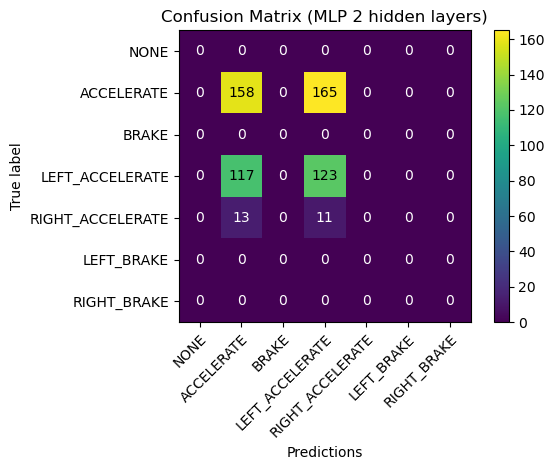

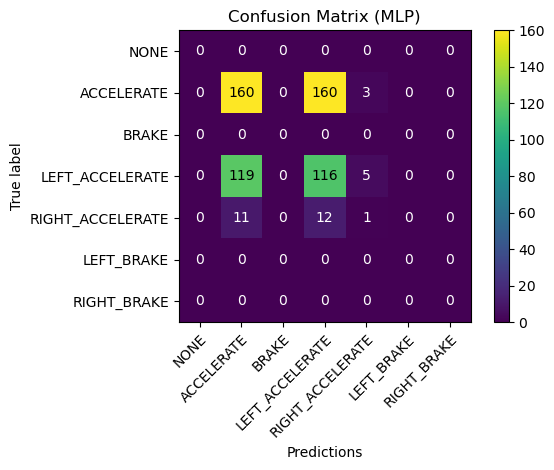

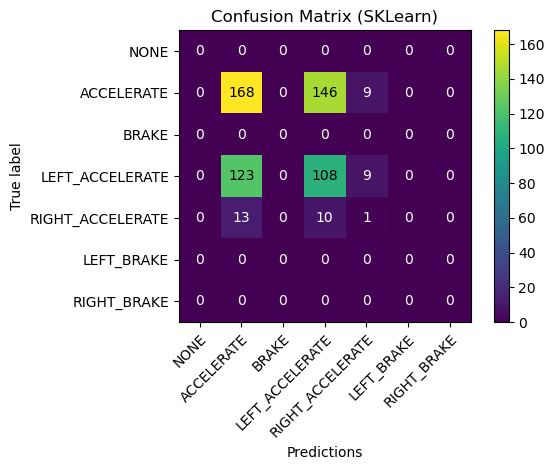

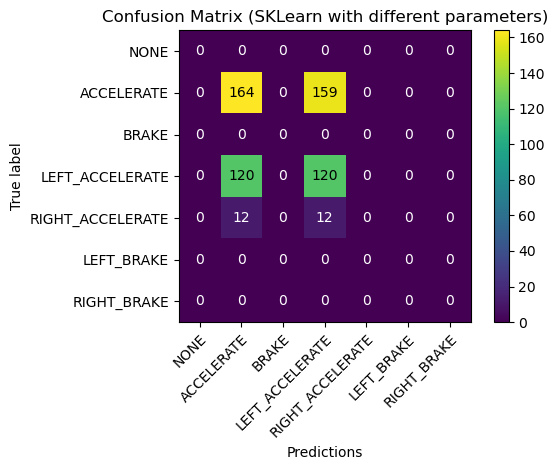

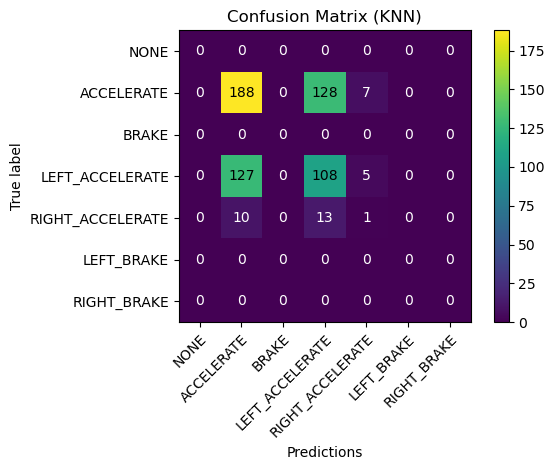

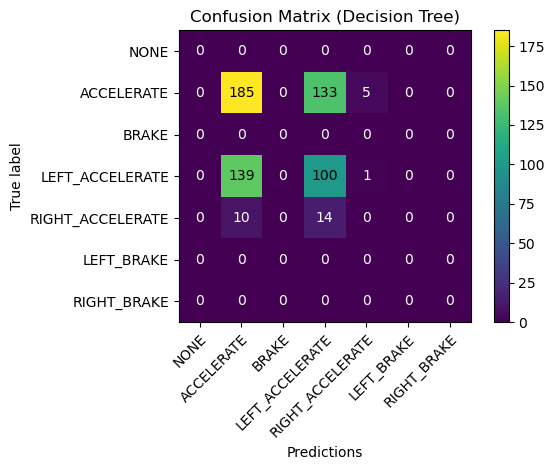

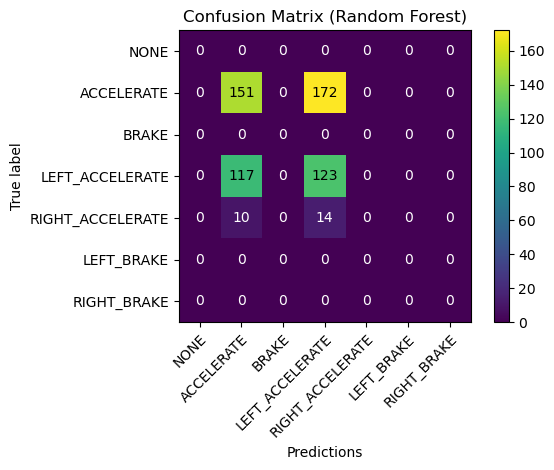

In [17]:
# Ejercicio 4
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from Utils import load_data_csv,one_hot_encoding,accuracy,calculateConfusionMatrix,drawConfusionMatrix
from MLP_Complete import MLP_Complete

label_mapping = {
    0: "NONE",
    1: "ACCELERATE",
    2: "BRAKE",
    3: "LEFT_ACCELERATE",
    4: "RIGHT_ACCELERATE",
    5: "LEFT_BRAKE",
    6: "RIGHT_BRAKE",
}
label_mapping_inverse = {
    "NONE": 0,
    "ACCELERATE": 1,
    "BRAKE": 2,
    "LEFT_ACCELERATE": 3,
    "RIGHT_ACCELERATE": 4,
    "LEFT_BRAKE": 5,
    "RIGHT_BRAKE": 6
}

label_array = ["NONE","ACCELERATE","BRAKE","LEFT_ACCELERATE","RIGHT_ACCELERATE","LEFT_BRAKE","RIGHT_BRAKE"]

x_columns = ["ray1", "ray2", "ray3", "ray4", "ray5", "kartx", "kartz"]
kartData, X, y = load_data_csv("data/KartData.csv", x_columns, "action")

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X).T

# Split de los datos 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.33)
yEnc = one_hot_encoding(np.array(y_train),[label_array])
y_numbers = [label_mapping_inverse[label] for label in np.array(y)]

# Apartado 1
# Hiperparámetros para 2 capas ocultas
alpha_2 = 1.0 # learning rate
lambda_2 = 0.01
numiters_2 = 2000
hidden_layers_sizes_2 = [9,7]

# Perceptrón multicapa de implementación propia con más de 3 capas
mlpc_2 = MLP_Complete(X_train.shape[1],hidden_layers_sizes_2,yEnc.shape[1])
Jhistory_2 = mlpc_2.backpropagation(X_train,yEnc,alpha_2,lambda_2,numiters_2)
a1_2,ai_2,zi_2 = mlpc_2.feedforward(X_test)
y_pred_mlpc_2 = mlpc_2.predict(ai_2[len(ai_2) - 1])
y_pred_mlpc_labels_2 = [label_mapping[label] for label in y_pred_mlpc_2]

# Comprobación de resultados
accuracy_mlpc_2 = accuracy(y_test,y_pred_mlpc_labels_2)
print("MLP 2 hidden layers accuracy: " + str(accuracy_mlpc_2))

# Apartado 2
# Hiperparámetros para una única capa oculta
alpha_ = 1.0 # learning rate
lambda_ = 0.01
numiters_ = 2000
hidden_layers_sizes_ = [7]

# Perceptrón multicapa de implementación propia con una única capa
mlpc = MLP_Complete(X_train.shape[1],hidden_layers_sizes_,yEnc.shape[1])
Jhistory = mlpc.backpropagation(X_train,yEnc,alpha_,lambda_,numiters_)
a1,ai,zi = mlpc.feedforward(X_test)
y_pred_mlpc = mlpc.predict(ai[len(ai) - 1])
y_pred_mlpc_labels = [label_mapping[label] for label in y_pred_mlpc]

# Perceptrón multicapa de SKlearn
mlp = MLPClassifier(hidden_layer_sizes=tuple(hidden_layers_sizes_),activation='logistic',alpha=lambda_,learning_rate='constant',learning_rate_init=alpha_,max_iter=numiters_,random_state=0,epsilon=0.12)
mlp.fit(X_train,y_train)
y_pred_sklearn = mlp.predict(X_test)
y_pred_sklearn_numbers = [label_mapping_inverse[label] for label in y_pred_sklearn]

# Comprobación de resultados para una única capa oculta 
accuracy_mlpc = accuracy(y_test,y_pred_mlpc_labels)
print("MLP accuracy: " + str(accuracy_mlpc))
accuracy_sklearn = accuracy(y_test,y_pred_sklearn)
print("SKlearn accuracy: " + str(accuracy_sklearn))

# Apartado 3
# SKLearn con distintos parámetros
skalpha = 1.0
sklearningrate = 1.0
skiters = 1850
mlp_2 = MLPClassifier(hidden_layer_sizes=tuple(hidden_layers_sizes_2),activation='relu',alpha=skalpha,learning_rate='adaptive',solver='sgd',learning_rate_init=sklearningrate,max_iter=skiters,random_state=0,epsilon=0.12)
mlp_2.fit(X_train,y_train)
y_pred_sklearn_2 = mlp_2.predict(X_test)
y_pred_sklearn_2_numbers = [label_mapping_inverse[label] for label in y_pred_sklearn_2]

# Comprobación de resultados
accuracy_sklearn_2 = accuracy(y_test,y_pred_sklearn_2)
print("SKlearn modified accuracy: " + str(accuracy_sklearn_2))

# Apartado 4
# Modelo KNN
knn = KNeighborsClassifier(p=3) # p > 2 -> minkowski_distance
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn_numbers = [label_mapping_inverse[label] for label in y_pred_knn]

# Comprobación de resultados
accuracy_knn = accuracy(y_test,y_pred_knn)
print("KNN accuracy: " + str(accuracy_knn))

# Apartado 5
# Modelo de árbol de decisión 
decisiontree = DecisionTreeClassifier(criterion='gini',splitter='best',max_leaf_nodes=20,max_features=7)
decisiontree.fit(X_train,y_train)
y_pred_tree = decisiontree.predict(X_test)
y_pred_tree_numbers = [label_mapping_inverse[label] for label in y_pred_tree]

# Comprobación de resultados
accuracy_decisontree = accuracy(y_test,y_pred_tree)
print("Decision Tree accuracy: " + str(accuracy_decisontree))

# Modelo Random Forest
randomforest = RandomForestClassifier(n_estimators=2,max_leaf_nodes=5,max_features=7)
randomforest.fit(X_train,y_train)
y_pred_forest = randomforest.predict(X_test)
y_pred_forest_numbers = [label_mapping_inverse[label] for label in y_pred_forest]

# Comprobación de resultados
accuracy_forest = accuracy(y_test,y_pred_forest)
print("Random Forest accuracy: " + str(accuracy_forest))

# Apartado 6
# Matrices de Confusión
# Perceptrón multicapa de implementación propia con más de 3 capas
matrix_mlpc_2 = calculateConfusionMatrix(yEnc,y_pred_mlpc_2,y_numbers)
drawConfusionMatrix(matrix_mlpc_2,label_array,label_array,"images/ejercicio4_mlpc_2.png",title="Confusion Matrix (MLP 2 hidden layers)")

# Perceptrón multicapa de implementación propia con una única capa
matrix_mlpc = calculateConfusionMatrix(yEnc,y_pred_mlpc,y_numbers)
drawConfusionMatrix(matrix_mlpc,label_array,label_array,"images/ejercicio4_mlpc.png",title="Confusion Matrix (MLP)")

# Perceptrón multicapa de SKlearn
matrix_sklearn = calculateConfusionMatrix(yEnc,y_pred_sklearn_numbers,y_numbers)
drawConfusionMatrix(matrix_sklearn,label_array,label_array,"images/ejercicio4_sklearn.png",title="Confusion Matrix (SKLearn)")

# SKLearn con distintos parámetros
matrix_sklearn_2 = calculateConfusionMatrix(yEnc,y_pred_sklearn_2_numbers,y_numbers)
drawConfusionMatrix(matrix_sklearn_2,label_array,label_array,"images/ejercicio4_sklearn_2.png",title="Confusion Matrix (SKLearn with different parameters)")

# Modelo KNN
matrix_knn = calculateConfusionMatrix(yEnc,y_pred_knn_numbers,y_numbers)
drawConfusionMatrix(matrix_knn,label_array,label_array,"images/ejercicio4_knn.png",title="Confusion Matrix (KNN)")

# Modelo de árbol de decisión
matrix_decisiontree = calculateConfusionMatrix(yEnc,y_pred_tree_numbers,y_numbers)
drawConfusionMatrix(matrix_decisiontree,label_array,label_array,"images/ejercicio4_tree.png",title="Confusion Matrix (Decision Tree)")

# Modelo Random Forest
matrix_randomforest = calculateConfusionMatrix(yEnc,y_pred_forest_numbers,y_numbers)
drawConfusionMatrix(matrix_randomforest,label_array,label_array,"images/ejercicio4_randomforest.png",title="Confusion Matrix (Random Forest)")

## Apartado 6

> Explica qué modelo crees que se adapta mejor al juego y cuál elegirías

El modelo que se adapta mejor al juego es el modelo KNN con un _accuracy_ del 76.49%.

Tras eliminar del dataset los parámetros `time` y `karty` que resultaban parámetros irrelevantes, nos quedamos con 7 características. Esto conlleva a que los modelos más complejos como los árboles de decisión o Random Forest tengan pocas características y pocos datos con los que trabajar, además, como se observa en la gráfica nuestros datos están muy esparcidos.

Los modelos KNN no son capaces de encontrar las relaciones más complejas que hay entre inputs y outputs y son ligeramente más lentos que un modelo MLP. La principal diferencia es que los resultados que proporciona KNN suelen tener menor varianza y como en este juego en concreto el movimiento del coche se describe con listas de movimientos muy homogéneos es un enfoque perfecto para nuestro problema.

Como ya avisa el enunciado, con pocos datos y pocas características, aplicarle más capas ocultas no tendría mucho sentido porque estaríamos haciendo sobreingeniería dando a entender que directamente con una capa oculta ya funciona similar al problema con los modelos más complejos. Además, añadirle una capa oculta a la red de neuronas aumenta la complejidad del modelo lo que hace que encontrar los hiperparámetros más ideales sea mucho más complicado.

Se puede apreciar que nuestro perceptrón y sklearn con solo una única capa oculta dan resultados muy similares entre sí, la diferencia entre ellos es trivial ya que son modelos prácticamente idénticos salvo por las optimizaciones usadas en SKlearn que usa _adam_ y en la de modificada de SKlearn con la función de activación _reLu_. El modelo de SKLearn con parámetros modificados se aproxima más, creemos que establecer el optimizador estocástico ha podido afectar positivamente ya que contamos con 3 subconjuntos de datos completos en nuestro dataset es muy probable que sea capaz de escoger ejemplos relevantes y puede que esto le proporcione una ligera ventaja sobre adam.

## Apartado 7

> Itera entre los modelos, sus hiperparámetros, los datos exportados y la
> limpieza de los mismos, así como el número de ejemplos de entrenamiento
> hasta conseguir modelos con el mejor rendimiento teórico posible

Para perfeccionar los datos de los modelos, como se ha dicho en el anterior apartado, hemos descartado los parámetros de `time` y `karty` irrelevantes. Luego, las filas que contenían acciones `NONE` también fueron descartadas porque se trataban de situaciones en las que el coche normalmente debería acelerar, pero al estar en las primeras o las últimas milésimas de segundo de la partida, todavía no habíamos detectado la `W` o ya nos habíamos retirado de los controles del juego respectivamente.

Se iteró sobre los modelos con valores para alpha iguales a 0.001, 0.01, 0.1 y 1.0 entre otros intermedios y permanecen en el código aquellos que proporcionaban el mejor resultado.

Se iteró sobre los modelos con valores para lambda iguales a 0.0, 0.01, 0.1 ,0.5 y 1.0 entre otros intermedios y permanecen en el código aquellos que proporcionaban el mejor resultado.

Se alternó también el tamaño de las capas ocultas así como su tamaño, pero los modelos más complejos solo proporcionaban peores resultados como se explica en el apartado 6.

In [18]:
# Apartado 7
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from Utils import load_data_csv,one_hot_encoding,accuracy
from MLP_Complete import MLP_Complete

label_mapping = {
    0: "NONE",
    1: "ACCELERATE",
    2: "BRAKE",
    3: "LEFT_ACCELERATE",
    4: "RIGHT_ACCELERATE",
    5: "LEFT_BRAKE",
    6: "RIGHT_BRAKE",
}
label_mapping_inverse = {
    "NONE": 0,
    "ACCELERATE": 1,
    "BRAKE": 2,
    "LEFT_ACCELERATE": 3,
    "RIGHT_ACCELERATE": 4,
    "LEFT_BRAKE": 5,
    "RIGHT_BRAKE": 6
}

label_array = ["NONE","ACCELERATE","BRAKE","LEFT_ACCELERATE","RIGHT_ACCELERATE","LEFT_BRAKE","RIGHT_BRAKE"]

x_columns = ["ray1", "ray2", "ray3", "ray4", "ray5", "kartx", "kartz"]
kartData, X, y = load_data_csv("data/KartData.csv", x_columns, "action")

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X).T

# Split de los datos 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.33)
yEnc = one_hot_encoding(np.array(y_train),[label_array])
y_numbers = [label_mapping_inverse[label] for label in np.array(y)]

print("--- Highest accuracy values: ---")

# Perceptrón multicapa de implementación propia con una única capa
alpha_ = 1.0
lambda_ = 0.01
numiters_ = 2000
hidden_layers_sizes_ = [7]

mlpc = MLP_Complete(X_train.shape[1],hidden_layers_sizes_,yEnc.shape[1])
Jhistory = mlpc.backpropagation(X_train,yEnc,alpha_,lambda_,numiters_)
a1,ai,zi = mlpc.feedforward(X_test)
y_pred_mlpc = mlpc.predict(ai[len(ai) - 1])
y_pred_mlpc_labels = [label_mapping[label] for label in y_pred_mlpc]

accuracy_mlpc = accuracy(y_test,y_pred_mlpc_labels)
print("MLP highest accuracy: " + str(accuracy_mlpc))

# SKLearn
sklearn_iters = 600

mlp = MLPClassifier(max_iter=sklearn_iters)
mlp.fit(X_train,y_train)
y_pred_sklearn = mlp.predict(X_test)
y_pred_sklearn_numbers = [label_mapping_inverse[label] for label in y_pred_sklearn]

accuracy_sklearn = accuracy(y_test,y_pred_sklearn)
print("SKlearn highest accuracy: " + str(accuracy_sklearn))

# Modelo KNN
knn = KNeighborsClassifier(n_neighbors=15,p=3)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn_numbers = [label_mapping_inverse[label] for label in y_pred_knn]

# Comprobación de resultados
accuracy_knn = accuracy(y_test,y_pred_knn)
print("KNN highest accuracy: " + str(accuracy_knn))

# Modelo de árbol de decisión 
decisiontree = DecisionTreeClassifier(criterion='gini',splitter='best',max_leaf_nodes=9 ,max_features=7)
decisiontree.fit(X_train,y_train)
y_pred_tree = decisiontree.predict(X_test)
y_pred_tree_numbers = [label_mapping_inverse[label] for label in y_pred_tree]

# Comprobación de resultados
accuracy_decisontree = accuracy(y_test,y_pred_tree)
print("Decision Tree highest accuracy: " + str(accuracy_decisontree))

# Modelo Random Forest
randomforest = RandomForestClassifier(n_estimators=50,max_leaf_nodes=30)
randomforest.fit(X_train,y_train)
y_pred_forest = randomforest.predict(X_test)
y_pred_forest_numbers = [label_mapping_inverse[label] for label in y_pred_forest]

# Comprobación de resultados
accuracy_forest = accuracy(y_test,y_pred_forest)
print("Random Forest highest accuracy: " + str(accuracy_forest))

--- Highest accuracy values: ---
MLP highest accuracy: 0.7649063032367973
SKlearn highest accuracy: 0.7921635434412265
KNN highest accuracy: 0.7938671209540034
Decision Tree highest accuracy: 0.7853492333901193
Random Forest highest accuracy: 0.807495741056218


In [19]:
# Ejercicio 5
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from Utils import load_data_csv,one_hot_encoding,WriteStandardScaler,export_to_txt_custom
from MLP_Complete import MLP_Complete

# Exportar StandardScaler propio
x_columns = ["ray1", "ray2", "ray3", "ray4", "ray5", "kartx", "kartz"]
gameData, X, y = load_data_csv("data/KartData.csv", x_columns, "action")
df1 = pd.DataFrame(gameData, columns=x_columns)
mean = np.array(df1.mean(axis=0))
var = np.array(df1.var(axis=0))
WriteStandardScaler("unityUtils/StandardScalerDataPropio.txt", mean, var)

# Exportar modelo propio
label_mapping = {
    0: "NONE",
    1: "ACCELERATE",
    2: "BRAKE",
    3: "LEFT_ACCELERATE",
    4: "RIGHT_ACCELERATE",
    5: "LEFT_BRAKE",
    6: "RIGHT_BRAKE",
}

label_array = ["NONE","ACCELERATE","BRAKE","LEFT_ACCELERATE","RIGHT_ACCELERATE","LEFT_BRAKE","RIGHT_BRAKE"]

scaler = StandardScaler()
X = scaler.fit_transform(X).T

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.33)
yEnc = one_hot_encoding(np.array(y_train),[label_array])

alpha_ = 1.0
lambda_ = 0.01
numiters_ = 2000
hidden_layers_sizes_ = [7]

model = MLP_Complete(X_train.shape[1],hidden_layers_sizes_,yEnc.shape[1])
Jhistory_2 = model.backpropagation(X_train,yEnc,alpha_,lambda_,numiters_)
export_to_txt_custom(model,"unityUtils/model.custom.ml.propio.txt")

# Ejercicio 5

En los scripts de Unity, se han implementado los métodos `FeedForward` y `ConvertIndexToLabel` del `MLPModel`, y `Transform` del `StandardScaler` teniendo en cuenta que SKLearn implementa los sesgos como un vector aparte y no dentro de la matriz de pesos.

Para probar que pasa el test:
- Ir al GameObject `KartClassic_Player`
- Ir a su componente `MLAgent`
- En la lista de `Model` seleccionar `MLP`
- En `Index To Remove` dejarlo solo a uno con valor `8`
- Marcar `Test Feed Forward` si no estaba marcado
- Comprobar que en los campos `Text` (model.custom.ml.txt), `Standard Scaler` (StandarScalerData.txt) y `Training Csv` (Kart_Mejora_test), estén asignados correctamente y el `Accuracy` sea `0.8751472`

Luego, también se ha implementado nuestro modelo MLP con nuestros datos.

Primero, se ha exportado el StandardScaler usado obteniendo la media y la varianza de las columnas usadas (todas menos `karty` y `time`). Asimismo, para la exportación de nuestro modelo, se ha creado una función `export_to_txt_custom` en [Utils](Utils.py) como una versión modificada del `export_txt` sin que exporte `intercepts` porque en nuestro modelo no hay. Muy importante entrenar el modelo antes de exportarlo a Unity.

Segundo, el archivo de `KartData` usado en el entrenamiento se han quitado todas las filas que incluyen `NONE` en la columna de `action` (KartDataLimpio.csv, encontrado en Assets/MLModels).

En Unity, como copia modificada de `MLPModel`, se ha creado la clase `MLPModelPropio` que tiene en cuenta el añadir una capa de 1s para los sesgos durante el `FeedForward` como nuestro modelo en Python.

Para probarlo:
- Ir al GameObject `KartClassic_Player`
- Ir a su componente `MLAgent`
- En la lista de `Model` seleccionar `MLP Propio`
- En `Index To Remove` tener dos valores: `6` y `8`. Esto es porque omitimos `karty` y `time`
- Marcar `Test Feed Forward` si quiere
- Comprobar que en los campos `Text` (model.custom.ml.propio.txt), `Standard Scaler Propio` (StandardScalerDataPropio.txt) y `Training Csv` (KartDataLimpio.csv), estén asignados correctamente.

In [20]:
# Ejercicio 6 (opcional)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from Utils import load_data_csv,export_knn_to_txt

# Modelo KNN
x_columns = ["ray1", "ray2", "ray3", "ray4", "ray5", "kartx", "kartz"]
gameData, X, y = load_data_csv("data/KartData.csv", x_columns, "action")

scaler = StandardScaler()
X = scaler.fit_transform(X).T

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.33)

# Exportar los parametros usados del modelo
knn = KNeighborsClassifier(p=3) # p > 2 -> minkowski_distance
knn.fit(X_train,y_train)
export_knn_to_txt(knn,"unityUtils/model.knn.txt")

# Ejercicio 6 (opcional)

> Explica si ha funcionado mejor el modelo elegido en la práctica que el modelo de MLP

El modelo elegido ha sido `KNN` con una implementación muy básica y funciona peor que nuestro modelo MLP. Esto es debido a que, como se explica en el ejercicio 4, este modelo realmente no llega a deducir las relaciones más complejas que existen entre las variables. Como la gran mayoría del tiempo el único input que recibe es `ACCELERATE` y los giros se realizan en circunstancias muy puntuales, todos los inputs estarán siempre muy cerca de un `ACCELERATE` y no será capaz de percibir los cambios puntuales en las variables más importantes que marcan el momento de girar que sí consigue una red neuronal.

Para probarlo:
- Ir al GameObject `KartClassic_Player`
- Ir a su componente `MLAgent`
- En la lista de `Model` seleccionar `KNN`
- En `Index To Remove` tener dos valores: `6` y `8`. Esto es porque omitimos `karty` y `time`
- Marcar `Test Feed Forward` si quiere
- Comprobar que en los campos `Text` (model.knn.txt), `Standard Scaler Propio` (StandardScalerDataPropio.txt) y `Training Csv` (KartDataLimpio.csv), estén asignados correctamente.